### Daffa Kaisha Pratama Chandra

<center>
    <h2> Airbnb for Boston with Fraud Detection <br> </h2>
</center>

<hr>

### Brief Description About The Dataset
This dataset contains in total of 21 columns. The description of each columns can be seen on the table below.
| Col. Name   | Description |
| ----------- | ----------- |
| host_response_rate      | Integer (0 - 100)       |
| host_identity_verified  | Boolean (0 - 1)        | 
| host_total_listings_count | Integer (0 - 749)        | 
| City | Integer (0 - 37)        | 
| is_location_exact | Boolean (0 - 1)       | 
| property_type | Integer (0 - 12)       | 
| room_type | Integer (0 - 2)       |
| accommodates | Integer (0 - 16)       |
| bathrooms | Integer (0 - 6)       |
| bedrooms | Integer (0 - 5)       |
| beds | Integer (0 - 16)       |
| bed_type | Integer (0 - 4)       |
| ammenities | Integer (0 - 16)       |
| price | Integer (1000 - 400k)       |
| minimum_nights | Integer (1 - 300)       |
| number_of_reviews | Integer (0 - 404)       |
| review_scores_rating | Integer (20 - 100)       |
| instant_bookable | Boolean (0 - 1)       |
| cancelation_policies | Integer (0 - 3)       |
| reviews_per_month | Float (0.01 - 19.1)       |
| fraud | Boolean (0 - 1)       |

Link to dataset: https://www.kaggle.com/datasets/hawkingcr/airbnb-for-boston-with-fraud-detection

<hr>

### Import Libraries

In [1]:
# Raw Package
import pandas as pd
import numpy as np

# Data Viz
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Prep
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

# Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error

<hr>

#### Read data

In [2]:
data = pd.read_csv("output.csv")

# Take a look on the data
data.head()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,...,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,...,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,...,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,...,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,...,4,1794,15400,30,18,91.0,0,1,0.21,0


#### Exploratory Data Analysis

In [3]:
# Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

The data contain 21 columns and 3585 rows.

In [4]:
# Check the missing values
data.isnull().sum()

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

No missing values on the dataset. <br> <br>
Check the data distribution.

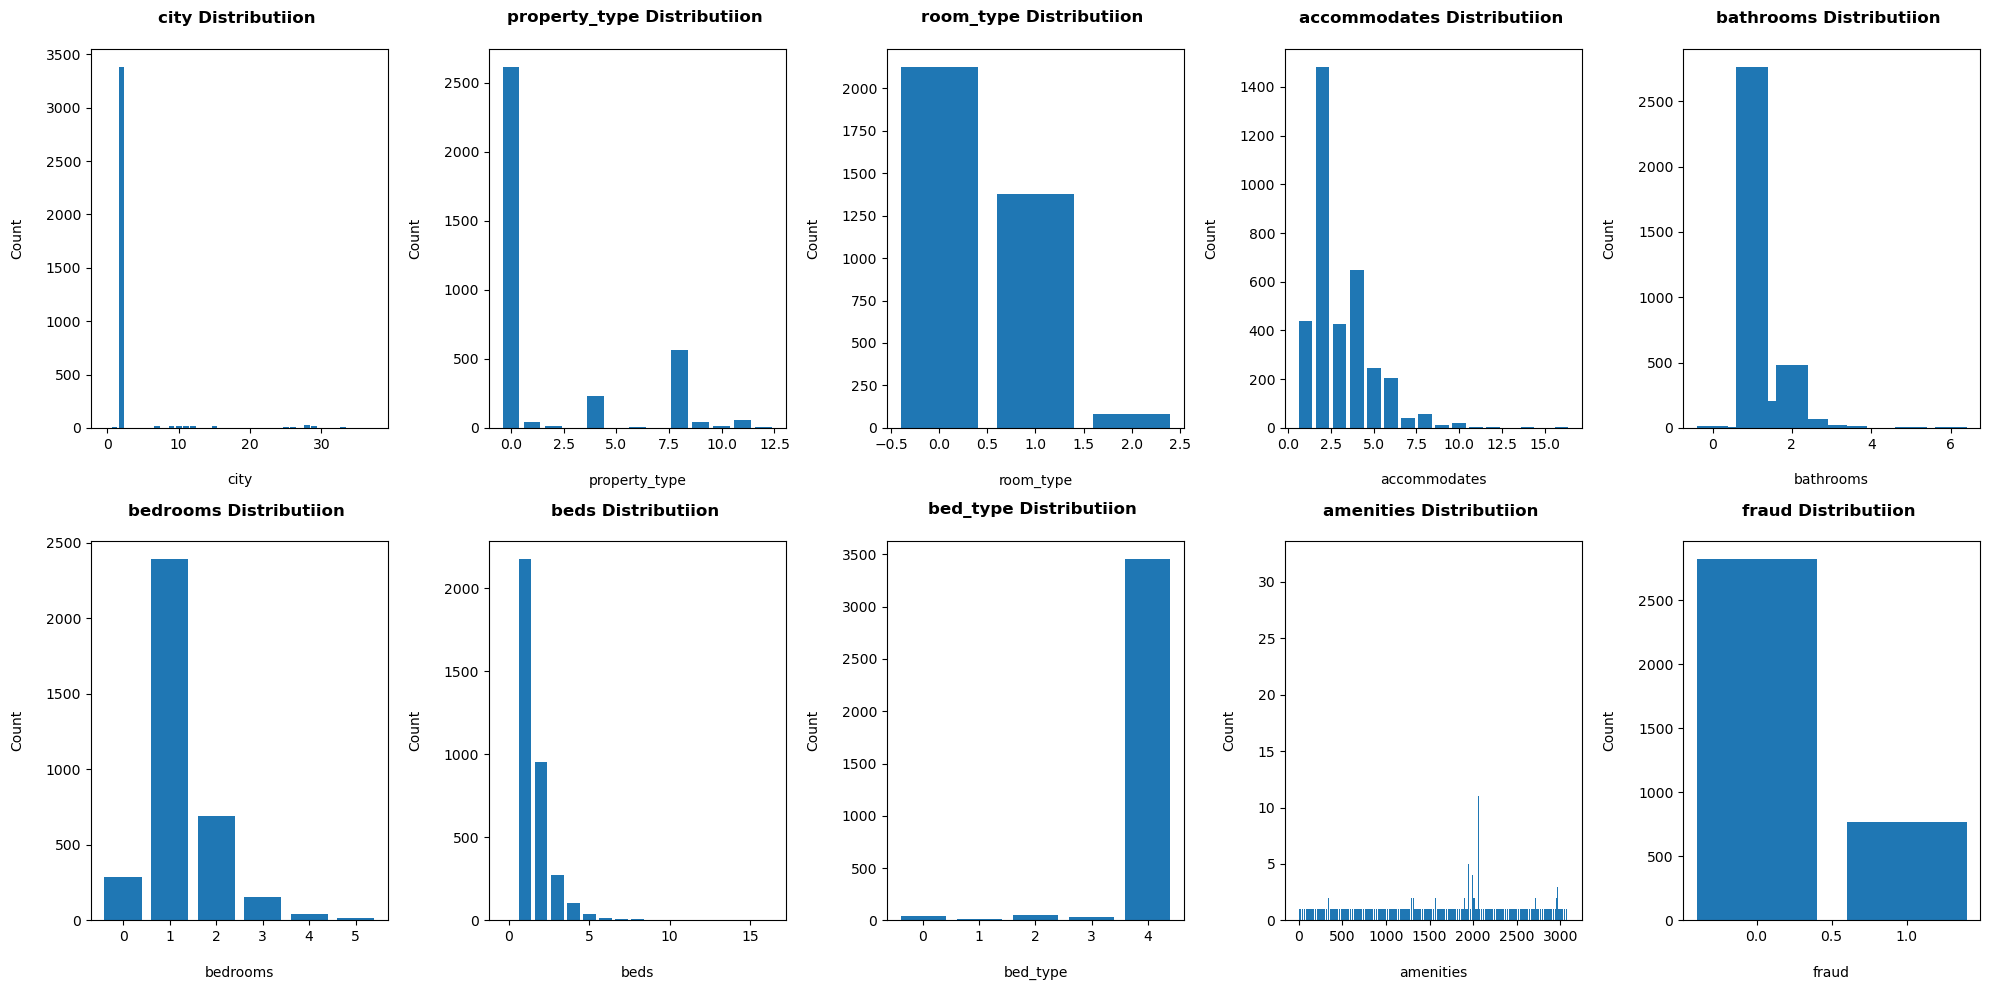

In [19]:
# Distribution Plot
cols = ['city', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'fraud']

fig, axes = plt.subplots(2, 5, figsize=(20,10))
axes = axes.flatten()

for i, columns in enumerate(cols):
    ax = axes[i]
    # count
    counts = data[columns].value_counts()
    # plot
    ax.bar(counts.index, counts.values)
    ax.set_title(f"{columns} Distributiion \n", weight='bold')
    ax.set_xlabel(f"\n{columns}")
    ax.set_ylabel("Count\n")
    
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x199a9a7a910>,
 'caps': [<matplotlib.lines.Line2D at 0x199a9a7aeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x199a9a7a640>],
 'medians': [<matplotlib.lines.Line2D at 0x199a9a89490>],
 'fliers': [<matplotlib.lines.Line2D at 0x199a9a89760>],
 'means': []}

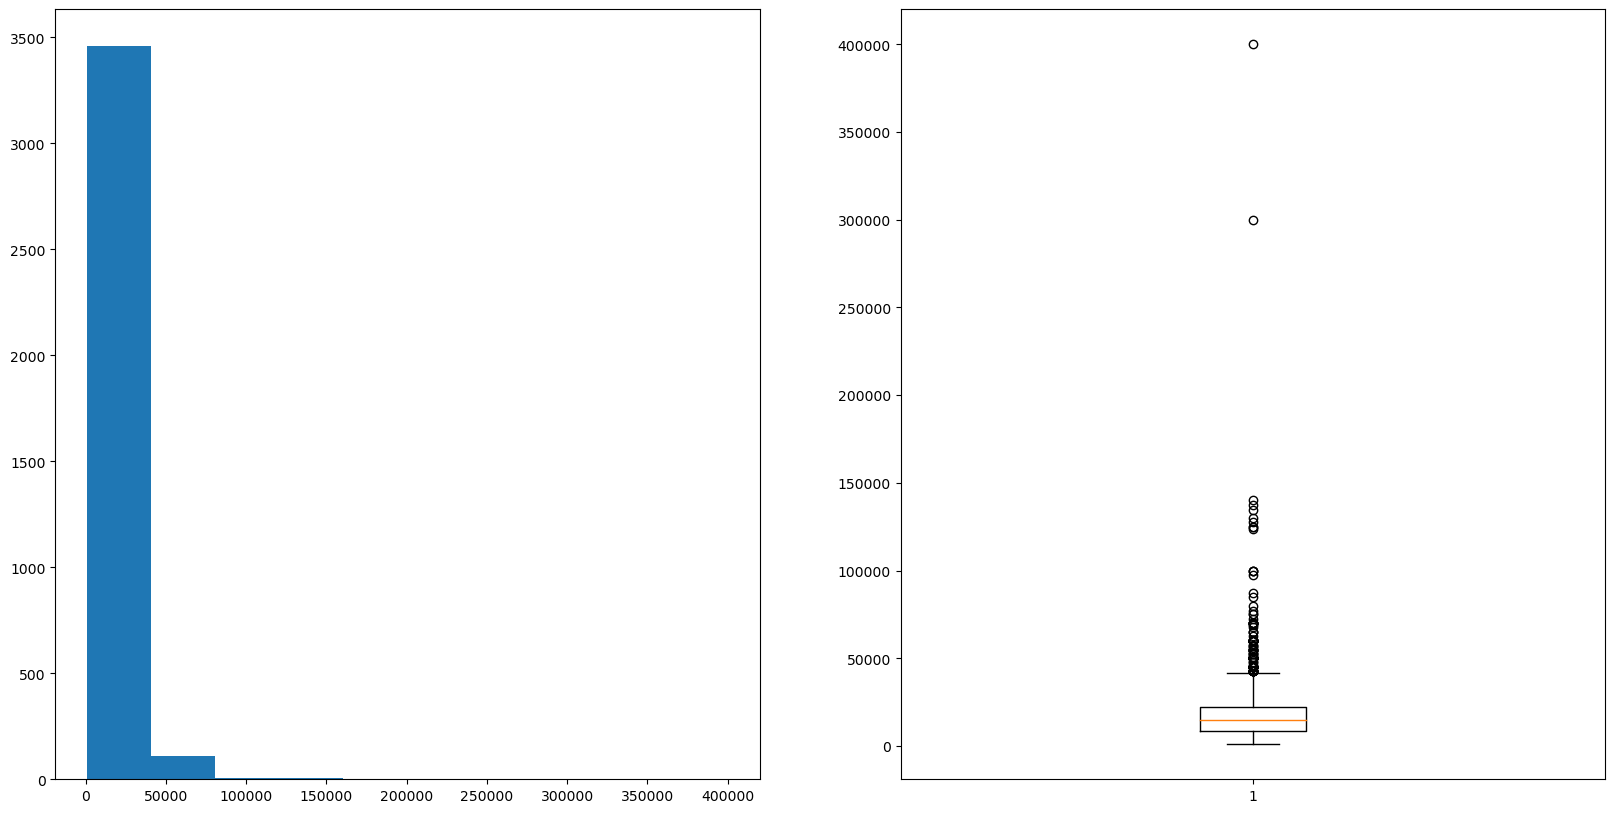

In [30]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes = axes.flatten()
axes[0].hist(data=data, x='price')
axes[1].boxplot(x='price', data=data)

What do we get from EDA:
1. The data contain 21 columns and 3585 rows.
2. Some of the data type is not in the correct type.
3. No missing values.
4. The data is imbalance.
5. There are many outliers.

<hr>

### Data Preparation